# Top ten movies by voter average and voter count (highest votes)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading in our files
mmdata = pd.read_csv("movies_metadata.csv")
ratings = pd.read_csv("ratings.csv")

In [18]:
# basic data check

# find number of movies and users and rated movies 

unique_movies = mmdata['movie_id'].nunique()
print(f"Number of unique movies: {unique_movies}")

unique_users = ratings['user_id'].nunique()
unique_rated_movies = ratings['movie_id'].nunique()
print(f"Count unique users: {unique_users}")
print(f"Count unique rated movies: {unique_rated_movies}")

Number of unique movies: 9010
Count unique users: 671
Count unique rated movies: 9010


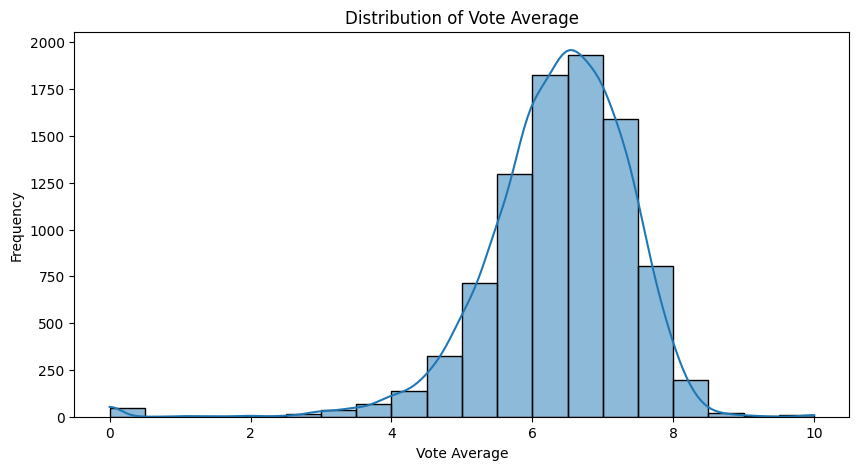

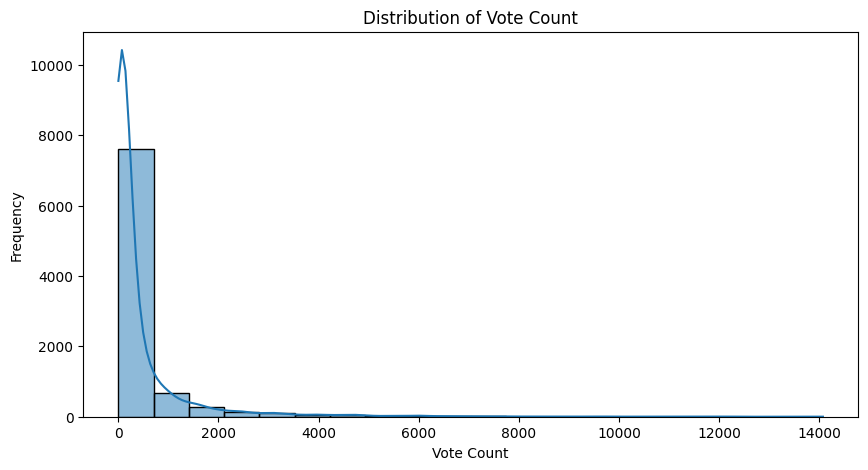

In [19]:
# visualizing the average rating

plt.figure(figsize=(10, 5))
sns.histplot(mmdata['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


# visualizing how votes range across movies 
plt.figure(figsize=(10, 5))
sns.histplot(mmdata['vote_count'], bins=20, kde=True)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

In [20]:
# creating a simple recommender based on movies with the highest ratings

def simple_recommender(movies_metadata, criterion='vote_average', top_n=10):
    """
    Generate a simple recommender based on the specified criterion.
    
    Parameters:
    - movies_metadata (DataFrame): DataFrame containing movie metadata.
    - criterion (str): Criterion to base recommendations on ('vote_average' or 'vote_count').
    - top_n (int): Number of top movies to recommend.
    
    Returns:
    - DataFrame: Top recommended movies based on the specified criterion.
    """
    
    recommended_movies = movies_metadata.sort_values(by=criterion, ascending=False)
    
    top_recommended_movies = recommended_movies.head(top_n)
    
    return top_recommended_movies[['movie_id', 'title', 'overview', criterion]]

#call the function and sort the top ten movies by voting average
simple_recommender(mmdata, criterion='vote_average', top_n=10)

,movie_id,title,overview,vote_average
8907,114241.0,Reckless,"On Christmas eve, a relentlessly cheerful woma...",10.0
8363,109381.0,Carmen Miranda: Bananas Is My Business,A biography of the Portuguese-Brazilian singer...,10.0
7463,97099.0,Common Threads: Stories from the Quilt,"In the late 1970s, a mysterious new disease be...",10.0
6603,79278.0,Chilly Scenes of Winter,A man falls for a separated woman but can't co...,10.0
873,118925.0,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",10.0
430,2751904.0,Survive and Advance,"In 1983, the NC State Wolfpack, coached by Jim...",10.0
2882,113270.0,"The Haunted World of Edward D. Wood, Jr.",The strange life and the wonderfully awful fil...,10.0
1910,98769.0,The Civil War,This highly acclaimed mini series traces the c...,9.2
6136,81846.0,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,9.1
4329,30371.0,Little Miss Broadway,An orphan is provisionally adopted by the mana...,9.0


In [21]:
#call the function and sort the top ten movies by voting count 
simple_recommender(mmdata, criterion='vote_count', top_n=10)

,movie_id,title,overview,vote_count
67,1375666.0,Inception,"Cobb, a skilled thief who commits corporate es...",14075.0
5577,468569.0,The Dark Knight,Batman raises the stakes in his war on crime. ...,12269.0
5761,499549.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",12114.0
8033,848228.0,The Avengers,When an unexpected enemy emerges and threatens...,12000.0
6935,1431045.0,Deadpool,Deadpool tells the origin story of former Spec...,11444.0
278,816692.0,Interstellar,Interstellar chronicles the adventures of a gr...,11187.0
6711,1853728.0,Django Unchained,"With the help of a German bounty hunter, a fre...",10297.0
1360,2015381.0,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",10014.0
7828,137523.0,Fight Club,A ticking-time-bomb insomniac and a slippery s...,9678.0
4484,1392170.0,The Hunger Games,Every year in the ruins of what was once North...,9634.0


## Create a recommendor that generated recommendations based on a movie title 

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# combine movies and ratings data 

movie_ratings = pd.merge(ratings, mmdata, on='movie_id')
movie_ratings

,user_id,movie_id,rating,title,overview,vote_average,vote_count
0,2,113862.0,3.0,Mr. Holland's Opus,"In 1965, passionate musician Glenn Holland tak...",6.9,115.0
1,2,114898.0,3.0,Waterworld,In a futuristic world where the polar ice caps...,5.9,1017.0
2,2,109444.0,4.0,Clear and Present Danger,CIA Analyst Jack Ryan is drawn into an illegal...,6.4,390.0
3,2,109830.0,3.0,Forrest Gump,A man with a low IQ has accomplished great thi...,8.2,8147.0
4,2,111257.0,3.0,Speed,Los Angeles SWAT cop Jack Traven is up against...,6.8,1814.0
...,...,...,...,...,...,...,...
99788,664,119008.0,4.5,Donnie Brasco,An FBI undercover agent infilitrates the mob a...,7.4,1175.0
99789,665,110322.0,4.0,Legends of the Fall,An epic tale of three brothers and their fathe...,7.2,636.0
99790,665,171363.0,2.0,The Haunting,"Dr. David Marrow invites Nell Vance, and Theo ...",5.2,374.0
99791,665,236493.0,3.0,The Mexican,"Jerry Welbach, a reluctant bagman, has been gi...",5.8,453.0


In [25]:
# simplify the merged data so that each movie has a column with ratings

user_movie_ratings = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')
user_movie_ratings = user_movie_ratings.fillna(0)

In [31]:
# cosine similarity matrix to determine how similar the ratings are 

# this will give you a movie with similar ratings 

cosine_sim = cosine_similarity(user_movie_ratings.T)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)

# get rec function 
def get_recommendations(movie_title, cosine_sim_df, num_recommendations=10):
    
    sim_scores = cosine_sim_df[movie_title]
    sim_scores = sim_scores.sort_values(ascending=False)
    top_recommendations = sim_scores.iloc[1:num_recommendations+1]
    
    return top_recommendations

# call the function 
recommendation1 = get_recommendations('Zero Dark Thirty', cosine_sim_df)
print("List of recommendations based on Zero Dark Thirty", recommendation1)

recommendation2 = get_recommendations('The Mummy Returns', cosine_sim_df)
print("List of reccomendations based on The Mummy Returns", recommendation2)


List of recommendations based on Zero Dark Thirty title
Lincoln                       0.709618
Contagion                     0.689930
The Wrestler                  0.679737
Moneyball                     0.655651
The Kids Are All Right        0.648691
The Fighter                   0.641276
Argo                          0.640597
The Place Beyond the Pines    0.639020
Flight                        0.629533
The Campaign                  0.628931
Name: Zero Dark Thirty, dtype: float64
List of reccomendations based on The Mummy Returns title
The Wedding Planner        0.481813
Gone in Sixty Seconds      0.479399
Lara Croft: Tomb Raider    0.478380
The Mummy                  0.476288
Troy                       0.466643
Red Eye                    0.462605
The Day After Tomorrow     0.461067
Miss Congeniality          0.453681
Pearl Harbor               0.443700
The Whole Nine Yards       0.426783
Name: The Mummy Returns, dtype: float64


# Lets you write a summary of the type of movie you want - Generative type 

We will be using an existing model that transforms a sentence into numbers for the computer to understand. It is called [SentenceTransformers](https://sbert.net/) and it is a Python module that allows us to simplify the movie recommender.

This is not going to be as good as ChatGPT, but it's small and efficient for this use-case!

In [ ]:
# uncomment the line below to install sentence transformer
#!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm

model = SentenceTransformer("all-MiniLM-L6-v2") # cited from SentenceTransformer docs

#clean our data by making sure overview column has strings only
mmdata['overview'] = mmdata['overview'].fillna('').astype(str)

# this embedding process will take about 4.52 minutes 
tqdm.pandas(desc="Generating embeddings")
mmdata['embedding'] = mmdata['overview'].progress_apply(lambda x: model.encode(x).tolist())


Generating embeddings: 100%|██████████| 9010/9010 [04:32<00:00, 33.12it/s]


In [40]:
# now lets use the cosine similarity and the embeddings to create a function 
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_movies(user_input, movies_metadata, model, top_n=5):
    # embedding for user input
    user_embedding = model.encode(user_input).tolist()
    
    #  cosine similarity between user input embedding and all movie embeddings
    movies_metadata['similarity'] = movies_metadata['embedding'].apply(lambda x: cosine_similarity([user_embedding], [x])[0][0])
    top_movies = movies_metadata.sort_values(by='similarity', ascending=False).head(top_n)
    
    return top_movies[['title', 'overview', 'similarity']]

# let's do an example call

recommendation3 = recommend_movies("action and suspense", mmdata, model)
recommendation3

,title,overview,similarity
3584,Fatal Instinct,A spoof of the late 80s and early 90s suspense...,0.517014
137,Tape,A three-character ensemble piece set within th...,0.494076
3138,Blithe Spirit,An English mystery novelist invites a medium t...,0.473640
8717,Atanarjuat: The Fast Runner,Based on a local legend and set in an unknown ...,0.472148
4695,Warm Bodies,After a zombie becomes involved with the girlf...,0.465411


## Usage

In [44]:
# replace the content inside the double quotes to a sentence/phrase 

user_test = recommend_movies("comedy and romance", mmdata, model)
user_test

,title,overview,similarity
6676,About Last Night,A modern reimagining of the classic romantic c...,0.626441
3096,All Over the Guy,A contemporary romantic comedy exploring the u...,0.621338
3537,Midnight in Paris,A romantic comedy about a family traveling to ...,0.604417
5302,Your Friends & Neighbors,"This adult comedy follows six characters, thre...",0.582483
5040,The Love Letter,A romantic comedy about a mysterious love lett...,0.574296
